<a href="https://colab.research.google.com/github/avigangarde/Google-Playstore-Analysis-/blob/main/Avinash_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## Android is being adopted by a large population across the globe. Android is used in over 74% of the world market, so it's worth creating or developing apps for this mobile operating system. bold text
## It's also worth investing in apps if you expect them to gain wider traction in the future. To make sure apps are tailored to the needs of users the analysis of data from the Google Play Store apps is extremely valuable. It can help developers design apps that are tailored to what users want and investors with decisions about how best to invest in future.

In [ ]:
# Lets import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# mount google drive to load file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path_2='/content/drive/MyDrive/capstone csv files/User Reviews.csv'
df2=pd.read_csv(file_path_2)

In [ ]:
file_path ='/content/drive/MyDrive/capstone csv files/Play Store Data.csv'
df1=pd.read_csv(file_path)

In [ ]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# checking for the df2
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# check the datatype of the columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# check the null values of the columns
df2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
# check the datatype for the df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Check the rows and columns in the data
df1.shape

(10841, 13)

In [ ]:
df2.shape

(64295, 5)

In [ ]:
# check the name of the columns
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Let us first define what information the columns contain based on our inspection. play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:

1.App - It tells us about the name of the application with a short description (optional).

2.Category - It gives the category to the app.

3.Rating - It contains the average rating the respective app received from its users.

4.Reviews - It tells us about the total number of users who have given a review for the application.

5.Size - It tells us about the size being occupied the application on the mobile phone.

6.Installs - It tells us about the total number of installs/downloads for an application.

7.Type - IIt states whether an app is free to use or paid.

8.Price - It gives the price payable to install the app. For free type apps, the price is zero.

9.Content Rating - It states whether or not an app is suitable for all age groups or not.

10.Genres - It tells us about the various other categories to which an application can belong.

11.Last Updated - It tells us about the when the application was updated.

12.Current Ver - It tells us about the current version of the application.

13.Android Ver - It tells us about the android version which can support the application on its platform.

In [ ]:
# It has just one numberical columns
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# **1.Data cleaning**

We will mostly be working with these columns: "Rating", "Size", "Installs", "Price".First we clean up all the nan values in this column, either replace them with some other value or remove all the special characters that are present in the particular column. Let's clean up by removing these and converting each column to a numeric type.

In [ ]:
# Check if there are any null values in the dataset
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

From above table we can say that there null values present in the rating columns(1474 null values ),type( 1 null values)content rating has (1 null values) and the current version has 8 null values and the android version has the 3 null values.

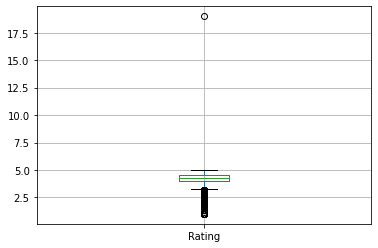

In [ ]:
# lets take rating columns and find the if there are any outerlier present in it
df1.boxplot()

We cam see that the most of the rating lies around the the 4.5 and we can conclude that the avergae rating of apps is around the 4.5 stars. we are also seen there is an oulier present in data lets find out that.

In [ ]:
df1[(df1["Rating"]>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df1['Rating'][10838]

nan

In [ ]:
df1[(df1["Rating"]>1)&(df1['Rating']<5) ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
median_of_rating = df1['Rating'].median()
mean_of_rating=df1['Rating'].mean()

In [ ]:
# lets replace the nan values with the mean or median of rating values /
# lets check the mean and median of the rating columns
print(f'The median of rating columns is {median_of_rating}')
print(f'The mean of rating columns is {mean_of_rating}')

The median of rating columns is 4.3
The mean of rating columns is 4.193338315362443


In [ ]:
# lets replace the nan values with the median of the rating column

df1['Rating']=df1['Rating'].fillna(mean_of_rating)

In [ ]:
# check if there are any null values present in the rating columns
df1['Rating'].isnull().sum()


0

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Since there is only one null value and most of the apps are from the free catogory so we are replacing the app with 'free'.
df1['Type']=df1.Type.fillna('Free')

In [ ]:
# In content rating columns has the both string value and numerical value and rating of the some apps is not defined so we decided to replace it with the 'Not defined
df1['Content Rating']=df1['Content Rating'].fillna('Not defined')

In [ ]:
# since the data is not given related field we decided to replace it with the 'Not given'
df1['Current Ver']=df1['Current Ver'].fillna('Not Given')

In [ ]:
# since the data is not given related field we decided to replace it with the 'Not given'
df1['Android Ver']=df1['Android Ver'].fillna('Not Given')

# **2.Data processing**

In [ ]:
df1['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

* We can see that the most number of apps are from the 'FAMILY
catgory and followed by the 'GAMES' , 'TOOL' , 'MEDICAL' , 'BUSINESS' , 'PRODUCTIVITY' and so on.


In [ ]:
df1['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

* Most of the time the app size varied with the device
*  After this , Apps that most fall in this with Size of 11MB ,12MB ,13MB  and so on.


In [ ]:
df1['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

* Most app in this have 1 million+ downloads
* Followed by the 10 million+ and 1lakh+ d0wnloads.
* There are 58 apps which have the 1 billion downloads.
* 409 apps have 100 million downloads.
* 72 apps have 500 million downloads.

In [ ]:
df1['Type'].value_counts()

Free    10040
Paid      800
0           1
Name: Type, dtype: int64

* Most of the apps are free.
* 800 apps are listed in paid category.

In [ ]:
price_df=df1['Price'].value_counts()

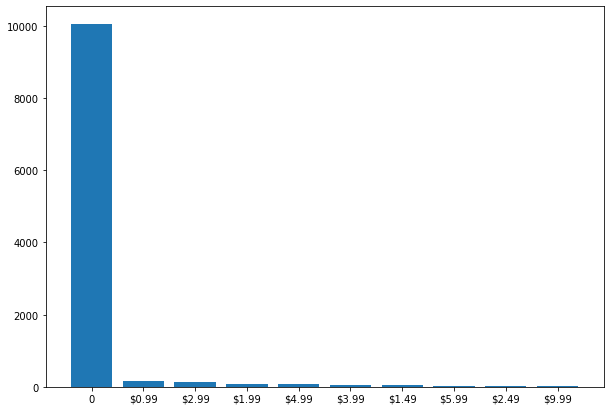

In [ ]:
fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
plt.bar(price_df.index[0:10], price_df.values[0:10])

# Show Plot
plt.show()

* Most of the paid apps are from the 0.99$
* As the price increses the apps are decresing.

In [ ]:
df1.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


* You can see that lot of values in the dataframe such as Size and Installs have '+' and ',' and 'M' or 'K' is attached to it lets convert them into numeric colums.

In [ ]:
# Lets remove the sign and make the column to numeric
# lets define the function
def remove_char(num):
  if '+'in num:
    num=num.replace('+','')
  if ','in num:
    num=num.replace(',','')
  if '$'in num:
    num=num.replace('$','')
  if 'M'in num:
    num=str(int(float(num.replace('M',''))*1000000))
  if 'k'in num:
    num=str(int(float(num.replace('k',''))*1000))
  if 'Varies with device' in num:
    num=num.replace('Varies with device',0)
  if 'NaN' in num:
    num=0
  else:
    pass
  return num


In [ ]:
df1['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

* We can see that some apps are present more than once . we  have to drop the duplicates from the given columns.

In [ ]:
# lets check the how many dulpicates are present there.
df1['App'].duplicated().sum()


1181

In [ ]:
# lets remove the duplicated values
df1.drop_duplicates(subset='App',inplace=True)

In [ ]:
df1.shape

(9660, 13)

In [ ]:
df1['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9660, dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9660 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9660 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9660 non-null   object 
 12  Android Ver     9660 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


# **3.Data cleaning of User review data file**

In [ ]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [45]:
# check the number of rows and column in dataframe
df2.shape

(64295, 5)

In [47]:
# check some information about the column
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


First lets have a look that what column names mean to be identified -:

user_reviews dataframe has 64295 rows and 5 columns. The 5 columns are identified as follows:

App: Contains the name of the app with a short description (optional).

Translated_Review: It contains the English translation of the review dropped by the user of the app.

Sentiment: It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.

Sentiment_Polarity: It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.

Sentiment_Subjectivity: This value gives how close a reviewers opinion is to the opinion of the general public. Its range is[0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.

# 4.Handling of NaN values 

In [48]:
df2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [49]:
df2['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

Inference: We see nearly all of the columns with sentiment contant null values in the above analysis, and we don't replace null values with any because they are categorical values.

so we drop all the null values from datasets

In [50]:
df2.dropna(inplace = True)

In [51]:
df2.shape

(37427, 5)

In [52]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


The values in the Sentiment_Polarity and Sentiment_Subjectivity looks correct.

We can now examine this data flow and create user-friendly visuals.

# **4.EDA ( Explorartary Data Analysis )**

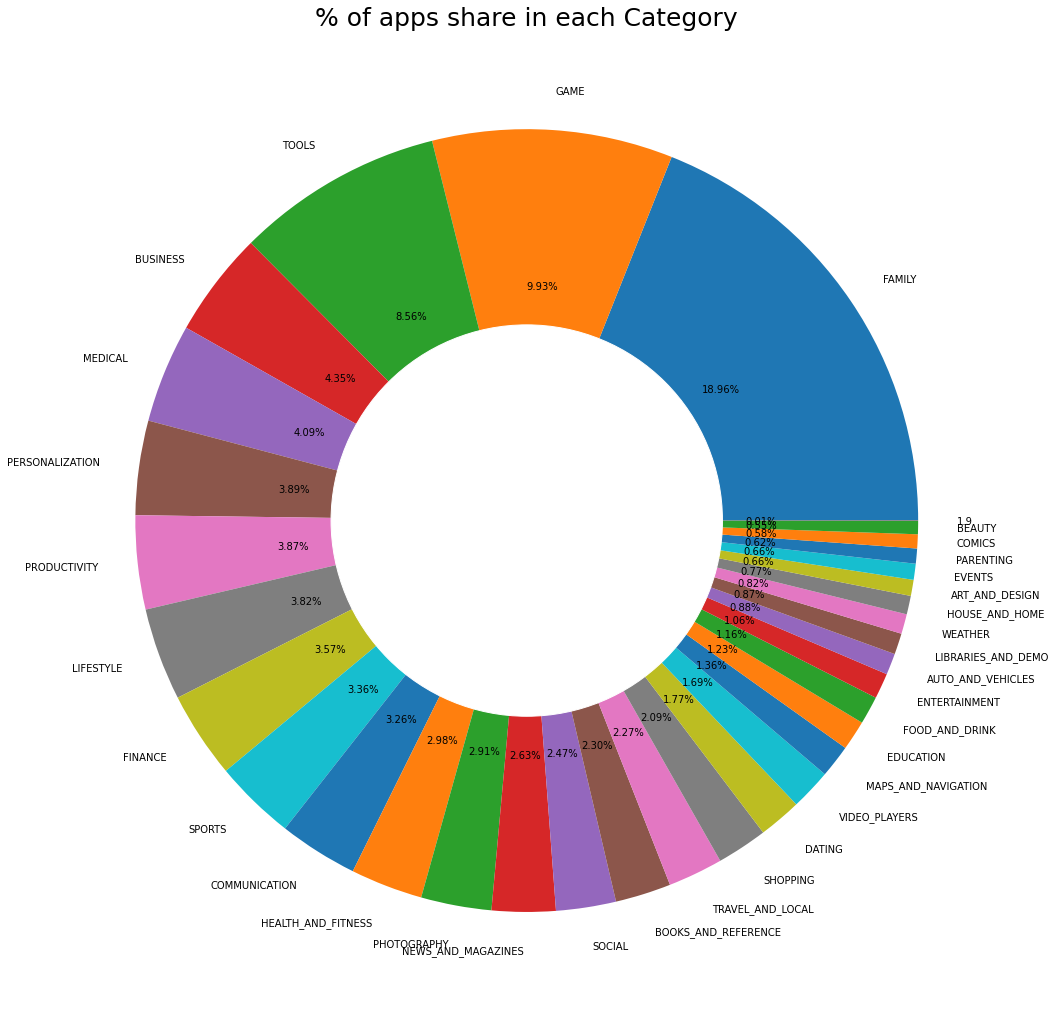

In [53]:
#Category
plt.figure(figsize=(18,18))
plt.pie(df1.Category.value_counts(), labels=df1.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()